# Simple Linear Model To Predict Financial Returns

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [33]:
data = pd.read_csv("five_minute.csv", parse_dates = ["time"], index_col = "time")

In [34]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [35]:
data["lag1"] = data.returns.shift(1)

In [36]:
data

,price,returns,lag1
time,,,
2019-01-01 22:00:00+00:00,1.146580,NaN,NaN
2019-01-01 22:05:00+00:00,1.146350,-0.000201,NaN
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-0.000201
2019-01-01 22:15:00+00:00,1.146320,0.000000,-0.000026
2019-01-01 22:20:00+00:00,1.146530,0.000183,0.000000
...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027


In [37]:
data.dropna(inplace = True)

In [39]:
lm = LinearRegression(fit_intercept=True)

In [40]:
lm.fit(data.lag1.to_frame(), data.returns)

LinearRegression()

In [41]:
slope = lm.coef_
slope

array([-0.03350837])

In [43]:
intercept = lm.intercept_
intercept

-3.2442471445009334e-07

In [49]:
data["pred"] = lm.predict(data.lag1.to_frame())
data

,price,returns,lag1,pred
time,,,,
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-0.000201,6.397912e-06
2019-01-01 22:15:00+00:00,1.146320,0.000000,-0.000026,5.525013e-07
2019-01-01 22:20:00+00:00,1.146530,0.000183,0.000000,-3.244247e-07
2019-01-01 22:25:00+00:00,1.146475,-0.000048,0.000183,-6.462425e-06
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,1.283038e-06
...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,3.414522e-06
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-1.748582e-07
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-1.221814e-06


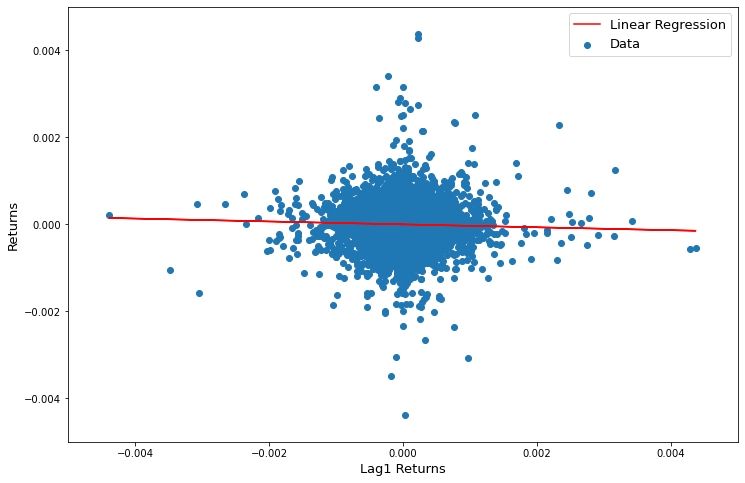

In [56]:
plt.figure(figsize = (12, 8))
plt.scatter(x = data.lag1, y = data.returns, label = "Data")
plt.plot(data.lag1, data.pred, c = "red", label = "Linear Regression")
plt.xlim(-0.005, 0.005)
plt.ylim(-0.005, 0.005)
plt.legend(fontsize = 13)
plt.xlabel("Lag1 Returns", fontsize = 13)
plt.ylabel("Returns", fontsize = 13)
plt.show()

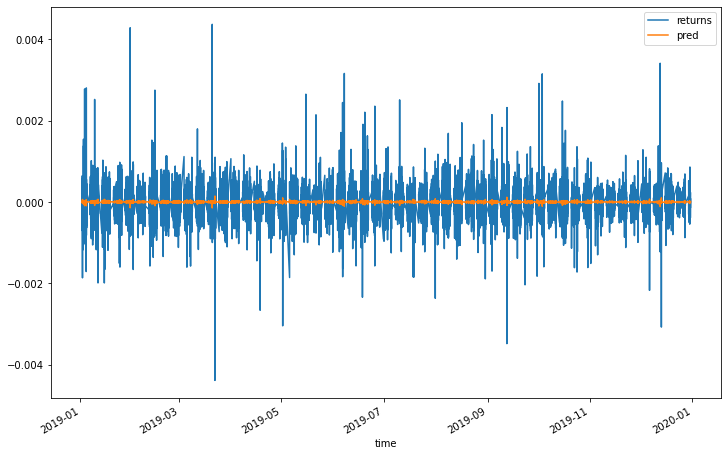

In [47]:
data[["returns", "pred"]].plot(figsize = (12, 8))
plt.show()

In [48]:
data.pred = np.sign(data.pred) # Maybe the model can predict the market direction (1, -1) instead of the returns
data

,price,returns,lag1,pred
time,,,,
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-0.000201,1.0
2019-01-01 22:15:00+00:00,1.146320,0.000000,-0.000026,1.0
2019-01-01 22:20:00+00:00,1.146530,0.000183,0.000000,-1.0
2019-01-01 22:25:00+00:00,1.146475,-0.000048,0.000183,-1.0
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,1.0
...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-1.0


In [50]:
np.sign(data.returns * data.pred)

time
2019-01-01 22:10:00+00:00   -1.0
2019-01-01 22:15:00+00:00    0.0
2019-01-01 22:20:00+00:00   -1.0
2019-01-01 22:25:00+00:00    1.0
2019-01-01 22:30:00+00:00   -1.0
                            ... 
2019-12-30 23:35:00+00:00   -1.0
2019-12-30 23:40:00+00:00   -1.0
2019-12-30 23:45:00+00:00   -1.0
2019-12-30 23:50:00+00:00    1.0
2019-12-30 23:55:00+00:00   -1.0
Length: 73718, dtype: float64

In [53]:
hits = np.sign(data.returns * data.pred).value_counts()
hits

 1.0    37451
-1.0    34308
 0.0     1959
dtype: int64

In [55]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio # Percentage of correctly forecasted market directions

0.5080306031091457

# Multiple Regression Model

In [57]:
data = pd.read_csv("five_minute.csv", parse_dates = ["time"], index_col = "time")
data.info()
data.dropna(inplace = True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73720 entries, 2019-01-01 22:00:00+00:00 to 2019-12-30 23:55:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   73720 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


In [58]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [61]:
lags = 5
cols = []
for lag in range(1, lags + 1):
    col = f"lag{lag}"
    data[col] = data.returns.shift(lag)
    cols.append(col)
    data.dropna(inplace = True)
data

,price,returns,lag1,lag2,lag3,lag4,lag5
time,,,,,,,
2019-01-02 01:50:00+00:00,1.144755,-0.000118,-0.000441,0.000148,-0.000044,0.000035,-0.000170
2019-01-02 01:55:00+00:00,1.145230,0.000415,-0.000118,-0.000441,0.000148,-0.000044,0.000035
2019-01-02 02:00:00+00:00,1.145300,0.000061,0.000415,-0.000118,-0.000441,0.000148,-0.000044
2019-01-02 02:05:00+00:00,1.145170,-0.000114,0.000061,0.000415,-0.000118,-0.000441,0.000148
2019-01-02 02:10:00+00:00,1.145335,0.000144,-0.000114,0.000061,0.000415,-0.000118,-0.000441
...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,0.000089
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-0.000004
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-0.000004,-0.000112,-0.000018,0.000022


In [ ]:
cols

In [62]:
lm = LinearRegression(fit_intercept = True)

In [63]:
lm.fit(data[cols], data.returns)

LinearRegression()

In [65]:
lm.coef_


array([-0.03357275, -0.00239478,  0.00363812, -0.00366518, -0.00357698])

In [66]:
lm.intercept_

-3.0867461875375376e-07

In [68]:
data["pred"] = lm.predict(data[cols].values)

In [69]:
data.pred= np.sign(data.pred)
data

,price,returns,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,
2019-01-02 01:50:00+00:00,1.144755,-0.000118,-0.000441,0.000148,-0.000044,0.000035,-0.000170,1.0
2019-01-02 01:55:00+00:00,1.145230,0.000415,-0.000118,-0.000441,0.000148,-0.000044,0.000035,1.0
2019-01-02 02:00:00+00:00,1.145300,0.000061,0.000415,-0.000118,-0.000441,0.000148,-0.000044,-1.0
2019-01-02 02:05:00+00:00,1.145170,-0.000114,0.000061,0.000415,-0.000118,-0.000441,0.000148,-1.0
2019-01-02 02:10:00+00:00,1.145335,0.000144,-0.000114,0.000061,0.000415,-0.000118,-0.000441,1.0
...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,0.000089,1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,-1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-1.0


In [70]:
data.pred.value_counts()

-1.0    39449
 1.0    34225
Name: pred, dtype: int64

In [72]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5080306031091457

   # In-sample Backtesting Strategy

In [96]:
data

,price,returns,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,
2019-01-01 23:20:00+00:00,1.146695,0.000022,0.000065,0.000057,-0.000017,0.000122,-0.000057,-1.0
2019-01-01 23:25:00+00:00,1.146650,-0.000039,0.000022,0.000065,0.000057,-0.000017,0.000122,-1.0
2019-01-01 23:30:00+00:00,1.146555,-0.000083,-0.000039,0.000022,0.000065,0.000057,-0.000017,1.0
2019-01-01 23:35:00+00:00,1.146630,0.000065,-0.000083,-0.000039,0.000022,0.000065,0.000057,1.0
2019-01-01 23:40:00+00:00,1.146500,-0.000113,0.000065,-0.000083,-0.000039,0.000022,0.000065,-1.0
...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,0.000089,1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,-1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-1.0


In [97]:
data["strategy"] = data.pred * data.returns

In [98]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

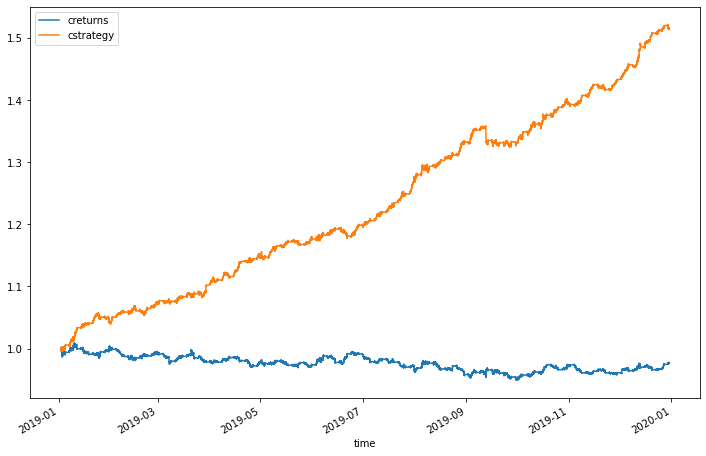

In [99]:
data[["creturns", "cstrategy"]].plot(figsize = (12, 8))
plt.show()

In [100]:
data["trades"] = data.pred.diff().fillna(0).abs()

In [101]:
data.trades.value_counts()

0.0    37061
2.0    36643
Name: trades, dtype: int64

In [102]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5086426788234018

# Out-Sample Forward Testing

In [88]:
data = pd.read_csv("five_minute.csv", parse_dates = ["time"], index_col = "time")

In [89]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [90]:
lags = 5

In [91]:
cols = []
for lag in range(1, lags + 1):
    col = f"lag{lag}"
    data[col] = data.returns.shift(lag)
    cols.append(col)
    data.dropna(inplace = True)
data

,price,returns,lag1,lag2,lag3,lag4,lag5
time,,,,,,,
2019-01-01 23:20:00+00:00,1.146695,0.000022,0.000065,0.000057,-0.000017,0.000122,-0.000057
2019-01-01 23:25:00+00:00,1.146650,-0.000039,0.000022,0.000065,0.000057,-0.000017,0.000122
2019-01-01 23:30:00+00:00,1.146555,-0.000083,-0.000039,0.000022,0.000065,0.000057,-0.000017
2019-01-01 23:35:00+00:00,1.146630,0.000065,-0.000083,-0.000039,0.000022,0.000065,0.000057
2019-01-01 23:40:00+00:00,1.146500,-0.000113,0.000065,-0.000083,-0.000039,0.000022,0.000065
...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,0.000089
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-0.000004
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-0.000004,-0.000112,-0.000018,0.000022


In [92]:
data["pred"] = lm.predict(data[cols].values)
data

,price,returns,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,
2019-01-01 23:20:00+00:00,1.146695,0.000022,0.000065,0.000057,-0.000017,0.000122,-0.000057,-2.948619e-06
2019-01-01 23:25:00+00:00,1.146650,-0.000039,0.000022,0.000065,0.000057,-0.000017,0.000122,-1.363880e-06
2019-01-01 23:30:00+00:00,1.146555,-0.000083,-0.000039,0.000022,0.000065,0.000057,-0.000017,1.049221e-06
2019-01-01 23:35:00+00:00,1.146630,0.000065,-0.000083,-0.000039,0.000022,0.000065,0.000057,2.203724e-06
2019-01-01 23:40:00+00:00,1.146500,-0.000113,0.000065,-0.000083,-0.000039,0.000022,0.000065,-2.762942e-06
...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,0.000089,3.258451e-06
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,-2.237791e-08
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-1.617439e-06


In [93]:
data.pred = np.sign(data.pred)

In [94]:
hits = np.sign(data.returns * data.pred).value_counts()
hits

 1.0    37489
-1.0    34258
 0.0     1957
dtype: int64

In [95]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5086426788234018

In [87]:
data["strategy"] = data.pred * data.returns
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)